<h2>Import Packeges</h2>

In [ ]:
# python ######################################################################
import sys
import os
import datetime
import jdatetime
import pkg_resources
# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py
from pm4py.stats import get_all_case_durations

# object.log ###################################################################
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter

# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.objects.conversion.wf_net.variants import to_bpmn, to_process_tree

# algo.conformance#################################################################
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

# vizualization###################################################################
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# util###########################################################################
from pm4py.util import vis_utils

import warnings

warnings.filterwarnings("ignore")

In [3]:
print(f'platform:     {sys.platform}')
print(f'python:       {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

package_versions = [
        ['pandas', pd.__version__], 
        ['numpy ', np.__version__], 
        ['matplotlib', sys.modules['matplotlib'].__version__], 
        ['seaborn', sns.__version__],
        ['ipywidgets', sys.modules['ipywidgets'].__version__],
        ['pm4py', pm4py.__version__],
        ['jdatetime', pkg_resources.get_distribution("jdatetime").version] 
]

pd.DataFrame(package_versions, columns = ['package', 'version'])

platform:     win32
python:       3.11.5


,package,version
0,pandas,1.5.3
1,numpy,1.24.3
2,matplotlib,3.8.4
3,seaborn,0.13.2
4,ipywidgets,7.8.1
5,pm4py,2.7.11.11
6,jdatetime,5.0.0


In [4]:
#read data using pandas 
data = pd.read_excel('data/sales.xlsx')

# Convert Jalali to Gregorian
data["زمان انجام"] = data["زمان انجام"].apply(lambda x: jdatetime.datetime.strptime(x, "%Y/%m/%d %H:%M:%S").togregorian())

<h2><b>Create event_log and view event_log using pm4py</b></h2>

In [6]:
event_log = pm4py.format_dataframe(data, 
                                    case_id='شماره پرونده',
                                    activity_key='فعاليت', 
                                    timestamp_key='زمان انجام')

In [7]:
event_log.head(7)

,شماره پرونده,فعاليت,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,گروه مشتري,شرح گروه مشتري,نام کاربري,...,سند حمل,کد موزع,نام موزع,نوع پرداخت,شرح نوع پرداخت,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,100989739,سفارش فروش,2021-09-23 08:11:44+00:00,ZO20,202012,منطقه10,14021788,1,خرده فروشي,VARANEGAR,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,سفارش فروش,2021-09-23 08:11:44+00:00,0,0
1,100989739,تاييد سرپرست,2021-09-23 11:38:51+00:00,ZO20,202012,منطقه10,14021788,1,خرده فروشي,A_KESHAVARZ,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,تاييد سرپرست,2021-09-23 11:38:51+00:00,1,0
2,100989739,دستور تحويل,2021-09-23 12:48:12+00:00,ZLF3,202012,منطقه10,14021788,1,خرده فروشي,F_ASHNAGAR,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,دستور تحويل,2021-09-23 12:48:12+00:00,2,0
3,100989739,سند حمل,2021-09-23 15:15:40+00:00,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,سند حمل,2021-09-23 15:15:40+00:00,3,0
4,100989739,دريافت تور,2021-09-25 06:59:57+00:00,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,دريافت تور,2021-09-25 06:59:57+00:00,4,0
5,100989739,ارسال تور,2021-09-25 14:17:23+00:00,ZP01,202012,منطقه10,14021788,1,خرده فروشي,H_FALAH,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,ارسال تور,2021-09-25 14:17:23+00:00,5,0
6,100989739,سند انبار,2021-09-25 14:40:21+00:00,WL,202012,منطقه10,14021788,1,خرده فروشي,R_MIRAZIMI,...,142600,E5700198,احمد امین,PTCA,نقدي - تسويه تا راس مشمول نقد,100989739,سند انبار,2021-09-25 14:40:21+00:00,6,0


<h2><b>export and import XES </b></h2>

In [9]:
xes_exporter.apply(event_log,'xes-dataset.xes')

exporting log, completed traces ::   0%|          | 0/12603 [00:00<?, ?it/s]

In [10]:
log = xes_importer.apply('xes-dataset.xes')

parsing log, completed traces ::   0%|          | 0/12603 [00:00<?, ?it/s]

<h2><b>explore event_log</b></h2>

In [12]:
type(log)

pm4py.objects.log.obj.EventLog

In [13]:
type(log[0])

pm4py.objects.log.obj.Trace

In [14]:
type(log[0][0])

pm4py.objects.log.obj.Event

In [15]:
start_activity = pm4py.get_start_activities(log)
end_activity = pm4py.get_end_activities(log)

print(f'Start activities: {start_activity}')
print(f'End activities  : {end_activity}')

Start activities: {'سفارش فروش': 12598, 'سند حمل': 5}
End activities  : {'فاکتور فروش': 11744, 'سند انبار': 859}


In [16]:
num_events = len(event_log)
num_cases = len(event_log["شماره پرونده"].unique())

print(f"Number of events: {num_events}\nNumber of cases: {num_cases}")

Number of events: 99973
Number of cases: 12603


In [17]:
#variants
len(pm4py.stats.get_variants(log))

4

<h2>least & highest average duration for customer group</h2>

In [19]:
# mean of each costumer group (duration)
grouped_df = event_log.groupby("گروه مشتري")["زمان انجام"].mean().reset_index()

In [20]:
#find least average duration for customer group
least_average_group = grouped_df.loc[grouped_df['زمان انجام'].idxmin()]
print(least_average_group)

#find highest average duration for customer group
highest_average_group = grouped_df.loc[grouped_df['زمان انجام'].idxmax()]
print(highest_average_group)

گروه مشتري                                      1
زمان انجام    2021-11-07 07:08:25.650838528+00:00
Name: 0, dtype: object
گروه مشتري                            7
زمان انجام    2021-12-02 12:52:39+00:00
Name: 4, dtype: object


<h2>Return Rate</h2>

In [22]:
# Group the data by customer group and count the number of returns
grouped_df = event_log.groupby("گروه مشتري")['وضعیت مرجوعی'].value_counts().unstack()

# Calculate the return rate for each group
#fillna for replace Nan to 0
grouped_df['Return Rate'] = (grouped_df['مرجوع شده'] / (grouped_df['مرجوع شده'] + grouped_df['مرجوع نشده']) * 100).fillna(0)

pd.DataFrame(grouped_df['Return Rate'])


,Return Rate
گروه مشتري,
1,6.284582
2,0.000000
3,0.915033
4,5.882353
7,14.893617
8,2.767840


<h2>so lowest return rate is for customer group 2 which is '0' and highest return rate is for customer group 7 which is '14.89'!!!</h2>

<h2>order_distribution on month and day of the week</h2>

In [25]:
#find each month 
event_log['month'] = event_log['time:timestamp'].dt.month
#find day of week 
event_log['day_of_week'] = event_log['time:timestamp'].dt.day_name() 

# Group by month and day of the week, and count the number of orders
order_distribution = event_log.groupby(['month', 'day_of_week']).size().unstack(fill_value=0)

order_distribution


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
9,0,0,1496,1681,2289,1699,1588
10,0,5639,6673,7989,5133,4331,4460
11,0,6575,5103,4752,4710,6573,5127
12,26,3830,3980,4056,3948,3817,4498


<h2>rework</h2>

In [27]:
#Find dublicated(rework)
event_log['is_rework'] = event_log.duplicated(subset=['شماره پرونده', 'فعاليت'])

rework_df= event_log[event_log['is_rework']]

#count rework and grouped for each document
rework_count_by_document = rework_df.groupby('نوع سند').size()

#count and grouped all document
total_count_by_document = event_log.groupby('نوع سند').size()

#create data frame of rework
pd.DataFrame(rework_count_by_document,columns=["تعداد دوباره کاری"])

,تعداد دوباره کاری
نوع سند,
WL,4
ZF01,2
ZSF1,2


In [28]:
pd.DataFrame(total_count_by_document)

,0
نوع سند,
WL,12607
ZF01,11746
ZLF3,12603
ZO20,25206
ZP01,37809
ZSF1,2


<h2>all "ZSF1" document are rework -> we can remove if it is not necessary for organization!!! </h2>

<h1>Process Discovery</h1>

<h2>alpha Performance</h2>

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

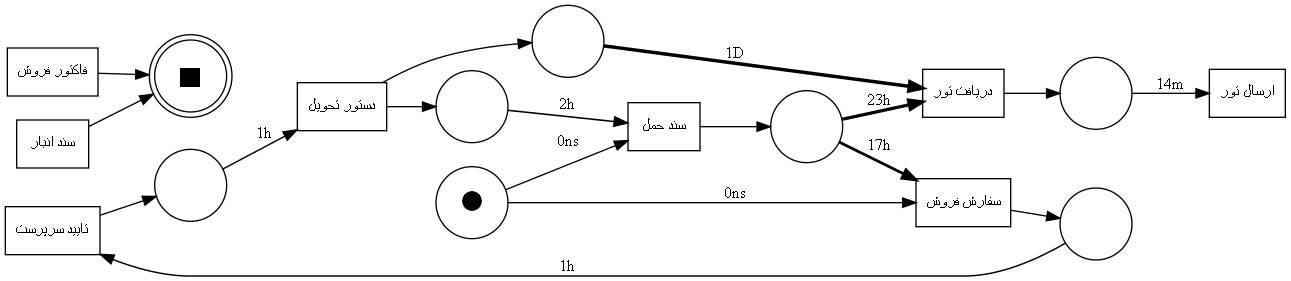

In [32]:
# alpha_Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)
#save image 
# pn_visualizer.save(gviz,'img/alpha_classic_petri_performance.png')

# View
pn_visualizer.view(gviz)

<h2>alpha Miner Performance</h2>

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

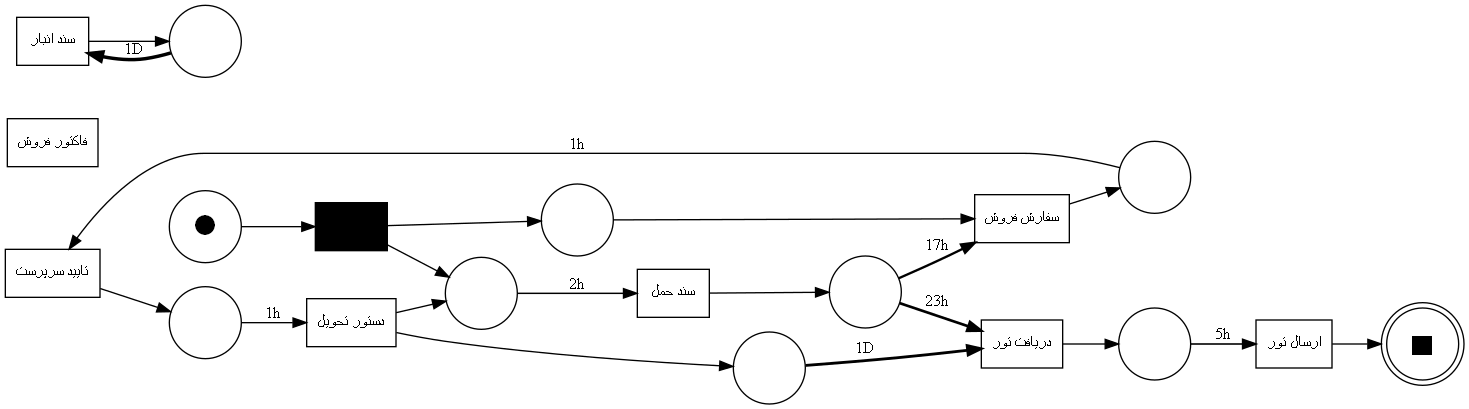

In [34]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)
#save image 
# pn_visualizer.save(gviz,'img/alpha_miner_classic_petri_performance.png')

# View
pn_visualizer.view(gviz)

<h2>heuristics miner Frequency</h2>

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

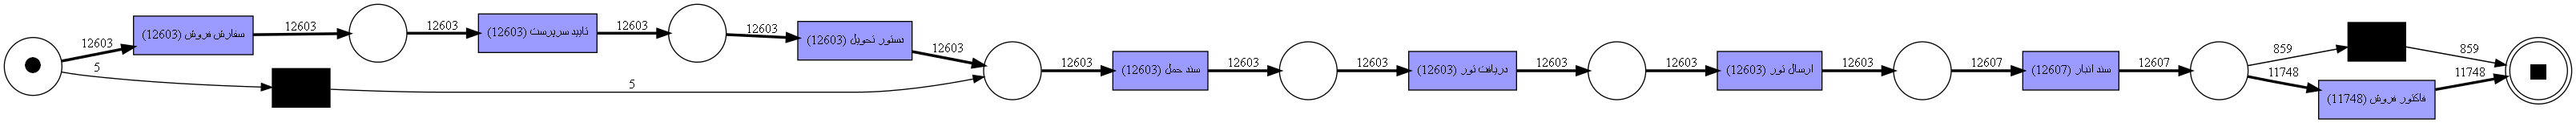

In [36]:
# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
#save image 
# pn_visualizer.save(gviz,'img/heuristics_miner_classic_petri_performance.png')

# View
pn_visualizer.view(gviz)

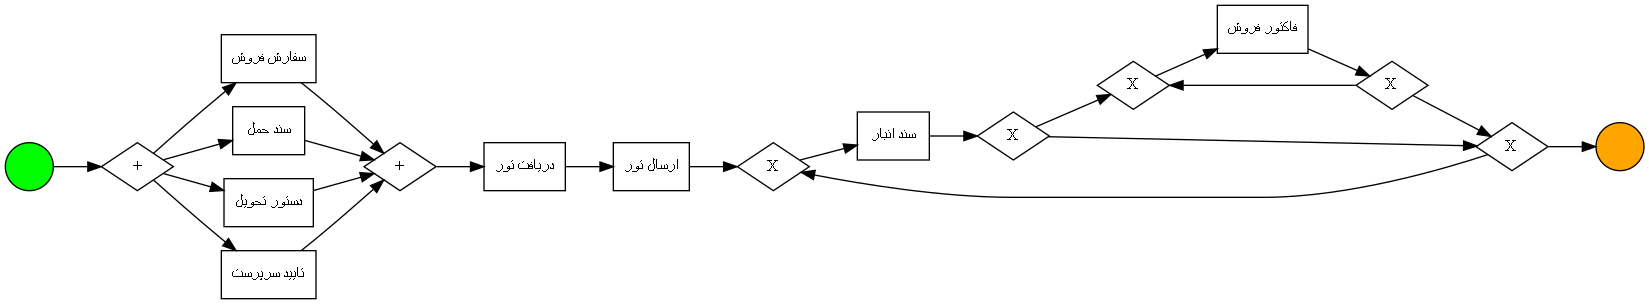

In [37]:
# Inductive Petri Net to BPMN
petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)

bpmn = to_bpmn.apply(petri_net, marking, final_marking)

#save image 
#pn_visualizer.save(gviz,'img/PetriNet_to_BPMN.png')

pm4py.view_bpmn(bpmn)

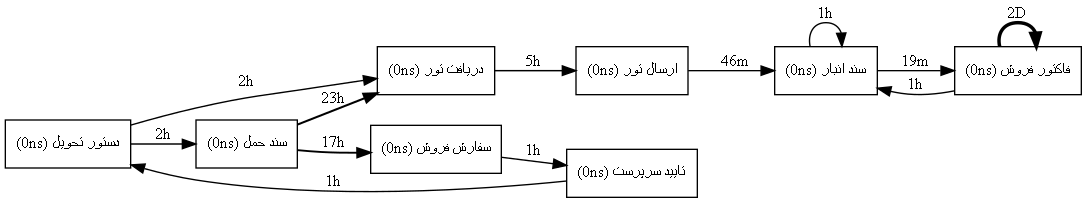

In [38]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# GraphViz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)

#save image 
# pn_visualizer.save(gviz,'img/dfg.png')

# View
dfg_visualization.view(gviz)

<h2>The longest and The shortest case duration</h2>

In [40]:
#start and end time 
case_start_times = event_log.groupby('case:concept:name')['time:timestamp'].min()
case_end_times = event_log.groupby('case:concept:name')['time:timestamp'].max()

# Calculate the duration for each case
case_durations = (case_end_times - case_start_times).dt.total_seconds() / 3600  # convert to hours

# Display the case durations
case_durations_df = case_durations.reset_index()
case_durations_df.columns = ['case_id', 'duration_hours']

# Find the longest duration
longest_duration = case_durations.max()
longest_duration_case = case_durations.idxmax()

# Find the longest duration
shortest_duration = case_durations.min()
shortest_duration_case = case_durations.idxmin()

# Display the result
print(f"The longest case duration is {longest_duration:.2f} hours for case ID: {longest_duration_case}")
print(f"The shortest case duration is {shortest_duration:.2f} hours for case ID: {shortest_duration_case}")

The longest case duration is 242.81 hours for case ID: 101005346
The shortest case duration is 3.19 hours for case ID: 101095657


In [41]:
#The shortest case duration 
shortest_case_events = event_log[event_log['case:concept:name'] == shortest_duration_case]
shortest_case_events.sort_values(by="زمان انجام")

,شماره پرونده,فعاليت,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,گروه مشتري,شرح گروه مشتري,نام کاربري,...,نوع پرداخت,شرح نوع پرداخت,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,month,day_of_week,is_rework
55325,101095657,سفارش فروش,2021-11-11 08:20:28+00:00,ZO20,202005,منطقه2,14086103,1,خرده فروشي,M_AZIMI,...,PT02,رسيدي,101095657,سفارش فروش,2021-11-11 08:20:28+00:00,55325,6978,11,Thursday,False
55326,101095657,تاييد سرپرست,2021-11-11 08:22:10+00:00,ZO20,202005,منطقه2,14086103,1,خرده فروشي,M_AZIMI,...,PT02,رسيدي,101095657,تاييد سرپرست,2021-11-11 08:22:10+00:00,55326,6978,11,Thursday,False
55327,101095657,دستور تحويل,2021-11-11 08:22:48+00:00,ZLF3,202005,منطقه2,14086103,1,خرده فروشي,M_AZIMI,...,PT02,رسيدي,101095657,دستور تحويل,2021-11-11 08:22:48+00:00,55327,6978,11,Thursday,False
55328,101095657,سند حمل,2021-11-11 08:30:17+00:00,ZP01,202005,منطقه2,14086103,1,خرده فروشي,H_FALAH,...,PT02,رسيدي,101095657,سند حمل,2021-11-11 08:30:17+00:00,55328,6978,11,Thursday,False
55329,101095657,دريافت تور,2021-11-11 11:12:25+00:00,ZP01,202005,منطقه2,14086103,1,خرده فروشي,H_FALAH,...,PT02,رسيدي,101095657,دريافت تور,2021-11-11 11:12:25+00:00,55329,6978,11,Thursday,False
55330,101095657,ارسال تور,2021-11-11 11:18:10+00:00,ZP01,202005,منطقه2,14086103,1,خرده فروشي,H_FALAH,...,PT02,رسيدي,101095657,ارسال تور,2021-11-11 11:18:10+00:00,55330,6978,11,Thursday,False
55331,101095657,سند انبار,2021-11-11 11:31:39+00:00,WL,202005,منطقه2,14086103,1,خرده فروشي,R_MIRAZIMI,...,PT02,رسيدي,101095657,سند انبار,2021-11-11 11:31:39+00:00,55331,6978,11,Thursday,False
55332,101095657,فاکتور فروش,2021-11-11 11:31:40+00:00,ZF01,202005,منطقه2,14086103,1,خرده فروشي,R_MIRAZIMI,...,PT02,رسيدي,101095657,فاکتور فروش,2021-11-11 11:31:40+00:00,55332,6978,11,Thursday,False


In [42]:
#The longest case duration 
longest_case_events = event_log[event_log['case:concept:name'] == longest_duration_case]
longest_case_events.sort_values(by = "زمان انجام")

,شماره پرونده,فعاليت,زمان انجام,نوع سند,ناحيه فروش,شرح ناحيه فروش,مشتري,گروه مشتري,شرح گروه مشتري,نام کاربري,...,نوع پرداخت,شرح نوع پرداخت,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,month,day_of_week,is_rework
8897,101005346,سفارش فروش,2021-09-30 11:37:11+00:00,ZO20,202015,منطقه12,14086231,8,مدير فروش سرد,VARANEGAR,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,سفارش فروش,2021-09-30 11:37:11+00:00,8897,1119,9,Thursday,False
8898,101005346,تاييد سرپرست,2021-09-30 12:43:14+00:00,ZO20,202015,منطقه12,14086231,8,مدير فروش سرد,A_KESHAVARZ,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,تاييد سرپرست,2021-09-30 12:43:14+00:00,8898,1119,9,Thursday,False
8899,101005346,دستور تحويل,2021-10-04 13:56:17+00:00,ZLF3,202015,منطقه12,14086231,8,مدير فروش سرد,M_AHMADI,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,دستور تحويل,2021-10-04 13:56:17+00:00,8899,1119,10,Monday,False
8900,101005346,سند حمل,2021-10-04 16:47:48+00:00,ZP01,202015,منطقه12,14086231,8,مدير فروش سرد,H_FALAH,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,سند حمل,2021-10-04 16:47:48+00:00,8900,1119,10,Monday,False
8901,101005346,دريافت تور,2021-10-10 13:41:16+00:00,ZP01,202015,منطقه12,14086231,8,مدير فروش سرد,H_FALAH,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,دريافت تور,2021-10-10 13:41:16+00:00,8901,1119,10,Sunday,False
8902,101005346,ارسال تور,2021-10-10 14:21:35+00:00,ZP01,202015,منطقه12,14086231,8,مدير فروش سرد,H_FALAH,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,ارسال تور,2021-10-10 14:21:35+00:00,8902,1119,10,Sunday,False
8903,101005346,سند انبار,2021-10-10 14:25:54+00:00,WL,202015,منطقه12,14086231,8,مدير فروش سرد,R_MIRAZIMI,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,سند انبار,2021-10-10 14:25:54+00:00,8903,1119,10,Sunday,False
8904,101005346,فاکتور فروش,2021-10-10 14:26:05+00:00,ZF01,202015,منطقه12,14086231,8,مدير فروش سرد,R_MIRAZIMI,...,PTCA,نقدي - تسويه تا راس مشمول نقد,101005346,فاکتور فروش,2021-10-10 14:26:05+00:00,8904,1119,10,Sunday,False


<b>we can find out why from "تاييد سرپرست" to "دستور تحويل and also from "سند حمل" to "دريافت تور" take so long <br> maybe it was holiday or some issue occurred </b>